# **Data Dictionary:**

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv('CC GENERAL.csv')

In [3]:
d

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


---------------------------------
#### Data Cleaning

In [4]:
ds = d.copy()

In [197]:
ds.isna().sum().sort_values(ascending = False).head()

CUST_ID              0
BALANCE              0
BALANCE_FREQUENCY    0
PURCHASES            0
ONEOFF_PURCHASES     0
dtype: int64

In [6]:
print(d.MINIMUM_PAYMENTS.dtypes)
print(d.CREDIT_LIMIT.dtypes)

float64
float64


In [7]:
# Giving varying treatment to features with missing values
ds['CREDIT_LIMIT'] = ds['CREDIT_LIMIT'].fillna(ds['CREDIT_LIMIT'].mean()) #.....Fill null with mean
ds['MINIMUM_PAYMENTS'] = ds['MINIMUM_PAYMENTS'].fillna(ds['MINIMUM_PAYMENTS'].mean()) #.... Fillnull with mode

ds.isnull().sum().sort_values(ascending = False).head(2)

CUST_ID    0
BALANCE    0
dtype: int64

-------------------------------------


Correlation Coefficient


<AxesSubplot:>

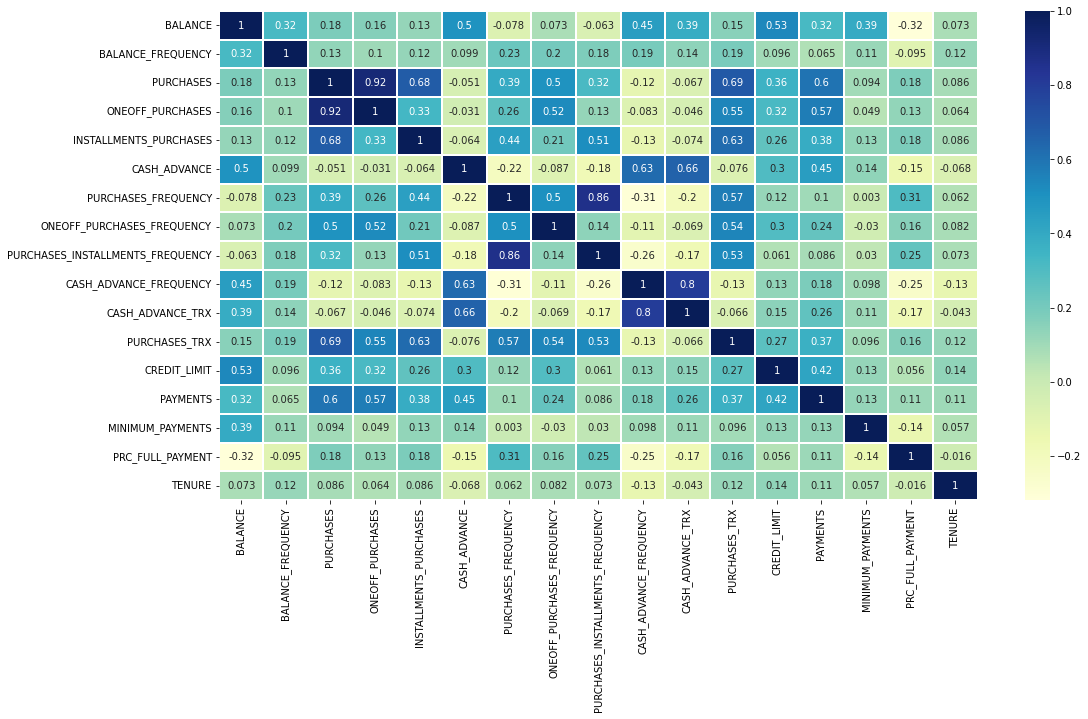

In [8]:
correlate = ds.corr()
  
f, ax = plt.subplots(figsize =(17, 9))
sns.heatmap(correlate, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)

- High positive correlation observed between Purchases and Installment_Purchases <br>
- High positive correlation observed between Cash Advanced TRX and Cash Advanced Frequency

In [9]:
# Drop one of highly correlated features
ds.drop(['CASH_ADVANCE_TRX', 'INSTALLMENTS_PURCHASES'], axis = 1, inplace = True)

-----------------------------
# **K Means Clustering**
##### **Itemize the clusters to deduce from the sets using a 2D-KMeans**
Balance and Purhase Frequency <br>
Purchase Installment Freq and Balance Freq <br>
Cash Advance Freq and Balance Freq <br>
Purchase and One_Off Purchases <br>
Balance Frequency and One_off Purchases <br>
Balance Freq and Purchase Freq

In [10]:
df = ds.copy()

###### Optimum number of K is 4

,ONEOFF_PURCHASES,PURCHASES
0,0.000000,0.001945
1,0.000000,0.000000
2,0.018968,0.015766
3,0.036775,0.030567
4,0.000393,0.000326


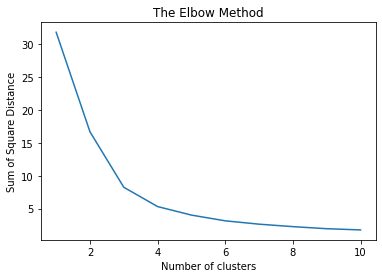

In [11]:
# Clustering of Customers according to 'Purchase' and 'One Off Purchase' of Customers

x1 = df[['ONEOFF_PURCHASES', 'PURCHASES']] #......Selecting the frame to use

scaler = MinMaxScaler() #......................... Scaling using MinMaxScaler

def minmax(b):
    for columnName, columnData in b.iteritems():
        b[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1,1))
minmax(x1)
display(x1.head())

# Using the elbow method, we determine the optimal number of K
sum_sqr_distance = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 97)
    kmeans.fit(x1)
    sum_sqr_distance.append(kmeans.inertia_)
plt.plot(range(1, 11), sum_sqr_distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Distance')
plt.show()

Optimal number of cluster is 4

In [12]:
# The elbow method shows a optimal K number of 4
# Fit KMeans on the frame

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 21) #.......... Instantiate the Clustering Algorithm
kmeans1 = kmeans.fit_predict(x1)
df['cluster_1'] = kmeans1 # .....................Create a column in the Mother Dataframe where customers will be shared into clusters
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_1
0,C10001,40.900749,0.818182,95.40,0.00,0.000000,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,0


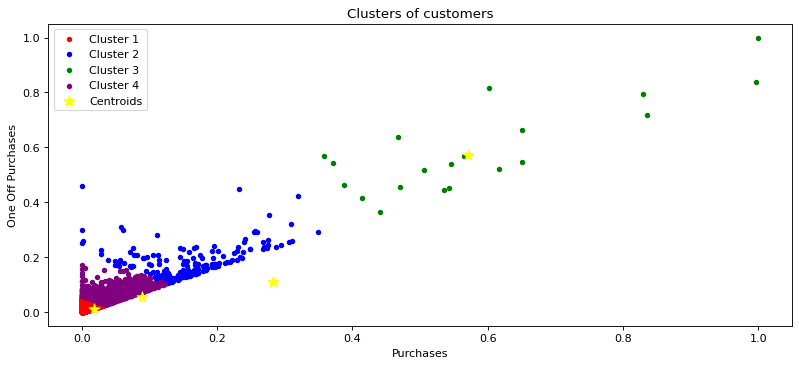

In [64]:
x1['cluster'] = kmeans1 # ................... Create a clustered class column in the selected frame

#  Slice the individual clusters
clust1_1 = x1[x1.cluster == 0] # ............ All cluster 1
clust1_2 = x1[x1.cluster == 1] # ............ All cluster 2
clust1_3 = x1[x1.cluster == 2] # ............ All cluster 3
clust1_4 = x1[x1.cluster == 3] # ............ All cluster 4


# Make a  Visualization of the Clustering classes
plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(clust1_1.ONEOFF_PURCHASES, clust1_1.PURCHASES, s = 15, c = 'red', label = 'Cluster 1')
plt.scatter(clust1_2.ONEOFF_PURCHASES, clust1_2.PURCHASES, s = 15, c = 'blue', label = 'Cluster 2')
plt.scatter(clust1_3.ONEOFF_PURCHASES, clust1_3.PURCHASES, s = 15, c = 'green', label = 'Cluster 3')
plt.scatter(clust1_4.ONEOFF_PURCHASES, clust1_4.PURCHASES, s = 15, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids', marker = '*')
plt.title('Clusters of customers')
plt.xlabel('Purchases')
plt.ylabel('One Off Purchases')
plt.legend()
plt.show()

**Analysis:** <br>
Clusters in order of left to right <br>
1. Red (First) Cluster: These are customers who have relatively low account and barely make a purchases on the go.
2. Purple(Second) Cluster: These are discount customers who only buys products or service if its been discounted and not listed at full retail price. They should be exposed to more sales deals.
2. Blue(Third) Cluster: These are customers who makes most impulse purchases on the go and often keeps some good amount of balance. They should be targetted with perks and sales discounts so to entice them to make more purchases. 
3. Green(Fourth) Cluster: These are our most valuable customers in terms of impulse purchases who keeps high balance and makes the most purchase. Advertisement strategies should be targetted at these cluster, and also be given high exposure to deals and discounts sales to induce more purchases.

,BALANCE,PURCHASES
0,0.002148,0.001945
1,0.168169,0.000000
2,0.131026,0.015766
3,0.087521,0.030567
4,0.042940,0.000326


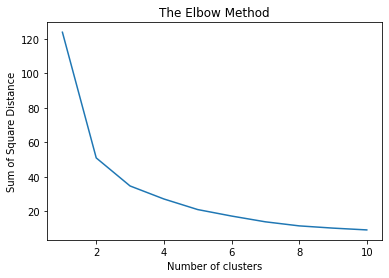

In [14]:
# Clustering of Customers according to Balance and Purchase of Customers

x2 = df[['BALANCE', 'PURCHASES']] #......Selecting the frame to use

scaler = MinMaxScaler() #......................... Scaling using MinMaxScaler

def minmax(b):
    for columnName, columnData in b.iteritems():
        b[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1,1))
minmax(x2)
display(x2.head())

# Using the elbow method, we determine the optimal number of K
sum_sqr_distance = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 97)
    kmeans.fit(x2)
    sum_sqr_distance.append(kmeans.inertia_)
plt.plot(range(1, 11), sum_sqr_distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Distance')
plt.show()

Optimal number of cluster is 4

In [15]:
# Fit KMeans on the frame

kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 21) #...... Used 7 clusters because I had desired output in mind
kmeans2 = kmeans.fit_predict(x2)
df['cluster_2'] = kmeans2 # ................................... Add the cluster column to the Grand DataFrame
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_1,cluster_2
0,C10001,40.900749,0.818182,95.40,0.00,0.000000,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,0,2
1,C10002,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,3,0
4,C10005,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,0,0


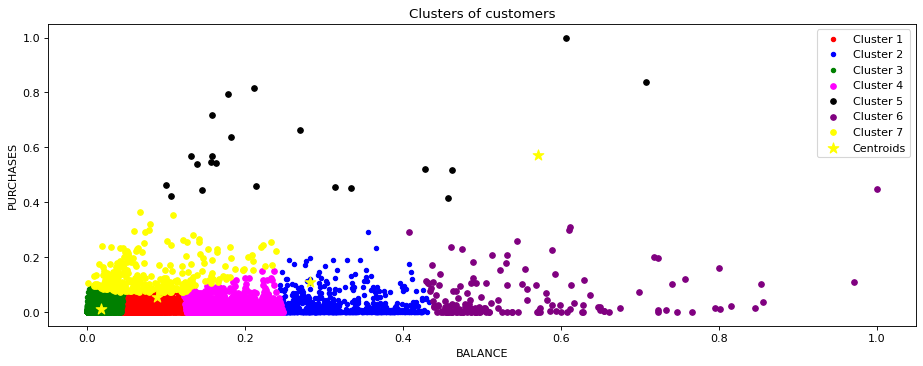

In [63]:
x2['cluster'] = kmeans2 # ................... Create a clustered class column in the selected frame

#  Slice the individual clusters
clust1_1 = x2[x2.cluster == 0] # ............ All cluster 1
clust1_2 = x2[x2.cluster == 1] # ............ All cluster 2
clust1_3 = x2[x2.cluster == 2] # ............ All cluster 3
clust1_4 = x2[x2.cluster == 3] # ............ All cluster 4
clust1_5 = x2[x2.cluster == 4] # ............ All cluster 5
clust1_6 = x2[x2.cluster == 5] # ............ All cluster 6
clust1_7 = x2[x2.cluster == 6] # ............ All cluster 7


# Make a  Visualization of the Clustering classes
plt.figure(figsize=(14, 5), dpi=80)
plt.scatter(clust1_1.BALANCE, clust1_1.PURCHASES, s = 15, c = 'red', label = 'Cluster 1')
plt.scatter(clust1_2.BALANCE, clust1_2.PURCHASES, s = 15, c = 'blue', label = 'Cluster 2')
plt.scatter(clust1_3.BALANCE, clust1_3.PURCHASES, s = 15, c = 'green', label = 'Cluster 3')
plt.scatter(clust1_4.BALANCE, clust1_4.PURCHASES, s = 25, c = 'magenta', label = 'Cluster 4')
plt.scatter(clust1_5.BALANCE, clust1_5.PURCHASES, s = 25, c = 'black', label = 'Cluster 5')
plt.scatter(clust1_6.BALANCE, clust1_6.PURCHASES, s = 25, c = 'purple', label = 'Cluster 6')
plt.scatter(clust1_7.BALANCE, clust1_7.PURCHASES, s = 25, c = 'yellow', label = 'Cluster 7')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids', marker = '*')
plt.title('Clusters of customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

**Analysis** <br> 
In order of Left to Right <br>
1. Green(First) Cluster: These are customers having low balances and make modest purchases. These customers shouldn't be our primary emphasis because they have limited purchasing power.
2. Yellow(Second) Cluster: These are need-based customers who are influnced by specific need. They enter knowing exactly what they want, make the purchase, and then leave. Upselling and cross selling to this segment of custmers may be challenging, though not impossible.
2. Black(Third) Cluster: These are the loyal customers who, although, are middle class earners,  keeps highest frequent purchase of items. They are indicators of improved brand and should be retained through engagement strategies such as offering loyalty card to encourage repeated purchase, turning them into advocates by acknowledging their contribution to business, and also offer mutual incentive to spread words of your business.
4. Blue(Fourth) Cluster: These are the dependable clients with balances ranging from moderate to large, but who also rarely make purchases. Their purchasing power is not very high given their modest purchases and average balance. In order to upgrade them to the next class, various unique incentives, such as a higher credit limit or discounts, may be provided.
5. Purple(Fifth) Cluster: These are valuable customers who keeps high balance but makes relatively low purchases when compared. Advertisement strategies such as upselling or cross (bundle) selling strategies, cold callings, etc, should be concerntrated on this cluster of customers to induce more purchases.

,PAYMENTS,PURCHASES
0,0.003979,0.001945
1,0.080893,0.000000
2,0.012264,0.015766
3,0.000000,0.030567
4,0.013374,0.000326


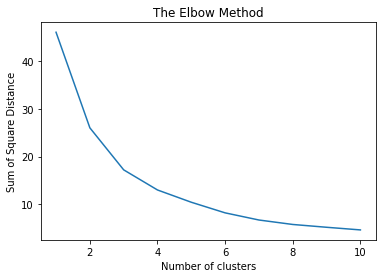

In [59]:
# Clustering of Customers according to Payment and Purchases

x3 = df[['PAYMENTS', 'PURCHASES']] #......Selecting the frame to use

scaler = MinMaxScaler() #......................... Scaling using MinMaxScaler

# scaler.fit(x3[['BALANCE']])
# x3['BALANCE'] = scaler.transform(x3[['BALANCE']])
def minmax(b):
    for columnName, columnData in b.iteritems():
        b[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1,1))
minmax(x3)
display(x3.head())

# Using the elbow method, we determine the optimal number of K
sum_sqr_distance = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 87)
    kmeans.fit(x3)
    sum_sqr_distance.append(kmeans.inertia_)
plt.plot(range(1, 11), sum_sqr_distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Distance')
plt.show()

Optimal number of cluster is 4

In [60]:
# Fit KMeans on the frame

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 81) #.......... Instantiate the Clustering Algorithm
kmeans3 = kmeans.fit_predict(x3)
df['cluster_3'] = kmeans3 # ..................... Add the cluster column to the Grand DataFrame
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_1,cluster_2,cluster_3
0,C10001,40.900749,0.818182,95.40,0.00,0.000000,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,0,2,0
1,C10002,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0,3,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0,3,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,3,0,0
4,C10005,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,0,0,0


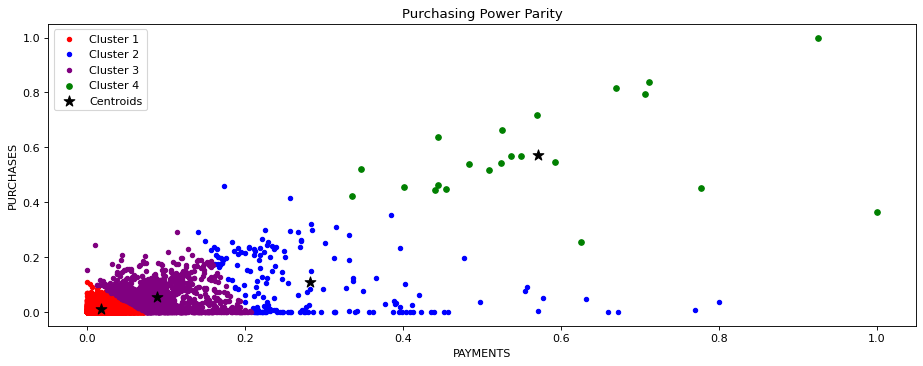

In [61]:
x3['cluster'] = kmeans3 # ................... Create a clustered class column in the selected frame

#  Slice the individual clusters
clust1_1 = x3[x3.cluster == 0] # ............ All cluster 1
clust1_2 = x3[x3.cluster == 1] # ............ All cluster 2
clust1_3 = x3[x3.cluster == 2] # ............ All cluster 3
clust1_4 = x3[x3.cluster == 3] # ............ All cluster 4


# Make a  Visualization of the Clustering classes
plt.figure(figsize=(14, 5), dpi=80)
plt.scatter(clust1_1.PAYMENTS, clust1_1.PURCHASES, s = 15, c = 'red', label = 'Cluster 1')
plt.scatter(clust1_2.PAYMENTS, clust1_2.PURCHASES, s = 15, c = 'blue', label = 'Cluster 2')
plt.scatter(clust1_3.PAYMENTS, clust1_3.PURCHASES, s = 15, c = 'purple', label = 'Cluster 3')
plt.scatter(clust1_4.PAYMENTS, clust1_4.PURCHASES, s = 25, c = 'green', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids', marker = '*')
plt.title('Purchasing Power Parity')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

# **Analysis**
In order of Left to Right<br>
1. Red(First) Cluster: These consumers grade extremely poorly in terms of payments and purchases. They shouldn't be our main priority.
2. Purple(Second) Cluster: These clients score a little less well when it comes to making purchases and paying bills. Other strategies, such as cross-selling and upselling, could be employed to increase these clients' purchases.
3. Blue(Third) Cluster: These clients are deserving of the highest level of attention because they routinely make medium-level purchases and payments. More importantly, with this group of people, cross-selling and upselling,amongst other strategies, are highly feasible. They can be targeted through tactics like rewards, discounts, and raffles, etc.
4. Green(Fourth) Cluster: These are highly transaction customers who makes high purchase and pays more. They ought to be involved in the introduction of new products, exposure to luxury goods, retention bonuses, discounts, etc.


,CREDIT_LIMIT,BALANCE
0,0.031720,0.002148
1,0.232053,0.168169
2,0.248748,0.131026
3,0.248748,0.087521
4,0.038397,0.042940


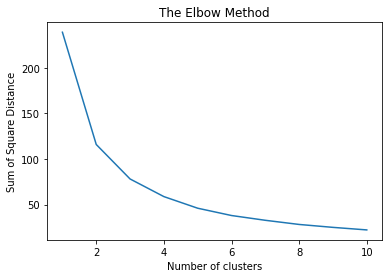

In [91]:
# Clustering of Customers according to Payment and Purchases

x4 = df[['CREDIT_LIMIT', 'BALANCE']] #......Selecting the frame to use

scaler = MinMaxScaler() #......................... Scaling using MinMaxScaler

def minmax(b):
    for columnName, columnData in b.iteritems():
        b[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1,1))
minmax(x4)
display(x4.head())

# Using the elbow method, we determine the optimal number of K
sum_sqr_distance = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 87)
    kmeans.fit(x4)
    sum_sqr_distance.append(kmeans.inertia_)
plt.plot(range(1, 11), sum_sqr_distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Distance')
plt.show()

Optimal number of cluster is 4

In [93]:
# Fit KMeans on the frame

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 4) #.......... Instantiate the Clustering Algorithm
kmeans4 = kmeans.fit_predict(x4)
df['cluster_4'] = kmeans4 # ..................... Add the cluster column to the Grand DataFrame
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_1,cluster_2,cluster_3,cluster_4
0,C10001,40.900749,0.818182,95.40,0.00,0.000000,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,0,2,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0,3,2,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0,3,0,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,3,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,0,0,0,0


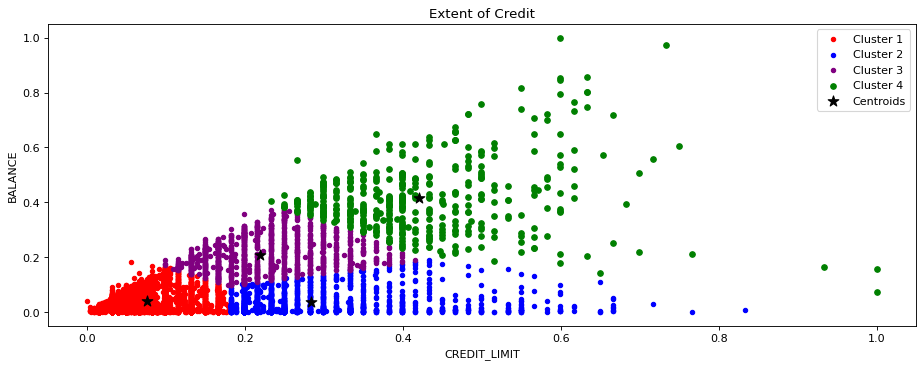

In [94]:
x4['cluster'] = kmeans4 # ................... Create a clustered class column in the selected frame

#  Slice the individual clusters
clust1_1 = x4[x4.cluster == 0] # ............ All cluster 1
clust1_2 = x4[x4.cluster == 1] # ............ All cluster 2
clust1_3 = x4[x4.cluster == 2] # ............ All cluster 3
clust1_4 = x4[x4.cluster == 3] # ............ All cluster 4

# Make a  Visualization of the Clustering classes
plt.figure(figsize=(14, 5), dpi=80)
plt.scatter(clust1_1.CREDIT_LIMIT, clust1_1.BALANCE, s = 15, c = 'red', label = 'Cluster 1')
plt.scatter(clust1_2.CREDIT_LIMIT, clust1_2.BALANCE, s = 15, c = 'blue', label = 'Cluster 2')
plt.scatter(clust1_3.CREDIT_LIMIT, clust1_3.BALANCE, s = 15, c = 'purple', label = 'Cluster 3')
plt.scatter(clust1_4.CREDIT_LIMIT, clust1_4.BALANCE, s = 25, c = 'green', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids', marker = '*')
plt.title('Extent of Credit')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('BALANCE')
plt.legend()
plt.show()

**Analysis:**
* From the sequence of left to right <br>
1. Red(First) centrod: This signifies customers having minimal credit limits and balances, indicating that they have limited purchasing power and shouldn't be our primary target market.
2. Purple(Second) Cluster: These cluster is majorly charaterized with customers having medium access to credit and are fairly active with us. Based on their limited acces to credit, they do not have a lot of spending power. To upgrade them, some extra benefits, such as a higher credit limit, may be provided to them.
3. Blue(Third) Cluster: Of the most valuable customers are those that fall under the third cluster. Both their balance and their credit limit are substantial. Better offers to shop with our credit card should be targeted at these group of customers as they are among our best-performing clients.
4. Green(Fourth) Cluster: Customers in this cluster are those with low balances but high credit limits, indicating that they are dependable and should be rewarded with engagement offerings.

# **Segmentation of  Customers Based On Frequencies**

In [202]:
# Create categories for frequencies

# PURCHASE FREQUENCY
p_freq = ds[['PURCHASES_FREQUENCY']] 
p_freq['purchase freq cat'] = pd.cut(x= p_freq['PURCHASES_FREQUENCY'], bins = [-1, 0.2, 0.55, 0.75, 1], 
                                        labels = ['one off', 'visitors', 'frequent', 'highly consistent'])

# PURCHASES TRANSACTION
p_trans = ds[['PURCHASES_TRX']] 
p_trans['purchase trans cat'] = pd.cut(x= p_trans['PURCHASES_TRX'], bins = [-1, 50, 150, 250, 358], 
                                        labels = ['low trans', 'average', 'high', 'premium'])

# PURCHASES
purchases = ds[['PURCHASES']]
purchases['purchases cat'] = pd.cut(x= purchases['PURCHASES'], bins = [-1, 100, 1000, 5000, 10000, 20000, 40000], 
                                        labels = ['very low income', 'low income', 'low middle class', 'high middle class',
                                         'high income', 'very high income'])

# BALANCE FREQUENCY
b_freq = ds[['BALANCE_FREQUENCY']]
b_freq['balance freq cat'] = pd.cut(x= b_freq['BALANCE_FREQUENCY'], bins = [-1, 0.2, 0.55, 0.75, 1], 
                                        labels = ['low balance', 'fair balance', 'medium balance', 'high balance'])

# INSTALLMENTAL PURCHASES
installment_purchase = ds[['PURCHASES_INSTALLMENTS_FREQUENCY']]
installment_purchase['installment cat'] = pd.cut(x= installment_purchase['PURCHASES_INSTALLMENTS_FREQUENCY'], bins = [-1, 0.2, 0.55, 0.75, 1], 
                                        labels = ['seldom', 'quite often', 'often', 'very often'])

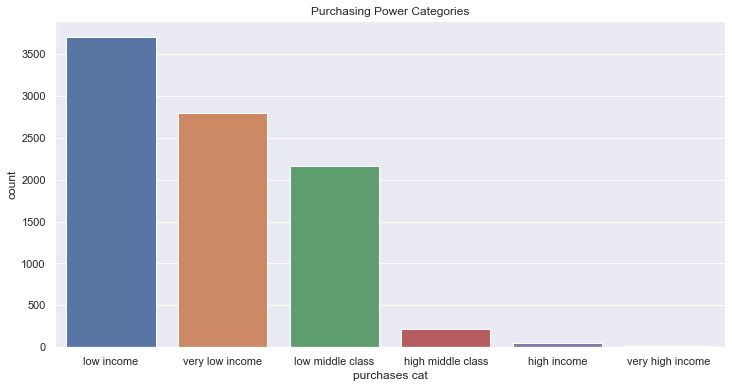

In [232]:
plt.figure(figsize = (12, 6))
sns.set(style = 'darkgrid')
orders = purchases['purchases cat'].value_counts(ascending = False).index
sns.countplot(x = purchases['purchases cat'], order = orders).set(title = 'Purchasing Power Categories')
plt.show()

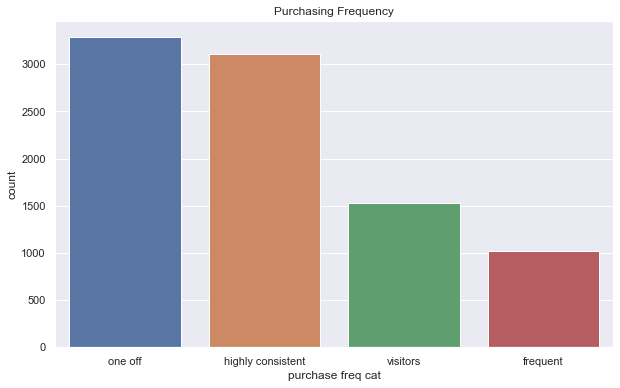

In [240]:
plt.figure(figsize = (10, 6))
sns.set(style = 'darkgrid')
orders = p_freq['purchase freq cat'].value_counts(ascending = False).index
sns.countplot(x = p_freq['purchase freq cat'], order = orders).set(title = 'Purchasing Frequency')
plt.show()

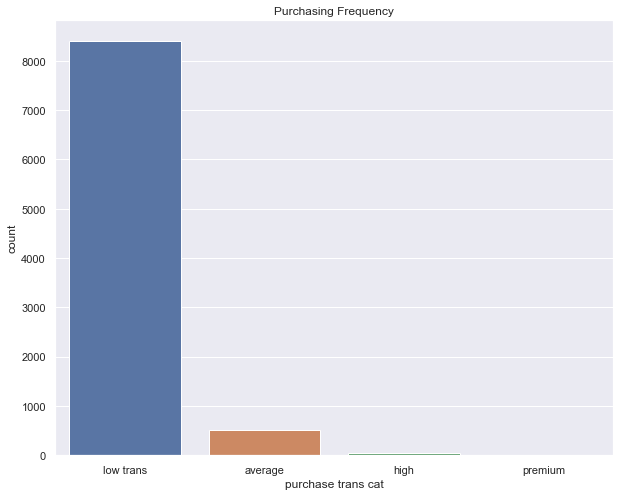

In [242]:
plt.figure(figsize = (10, 8))
sns.set(style = 'darkgrid')
orders = p_trans['purchase trans cat'].value_counts(ascending = False).index
sns.countplot(x = p_trans['purchase trans cat'], order = orders).set(title = 'Purchasing Transaction Categories')
plt.show()

In [137]:
from sklearn.utils import shuffle
shuffle(p_freq).head()

,PURCHASES_FREQUENCY,PURCHASES_TRX,purchase_freq_bins,purchase_trans_bins
213,0.750000,9,high_freq,starters
6217,0.250000,4,low freq,starters
5701,0.416667,5,medium_freq,starters
8388,0.833333,30,high_freq,starters
8547,1.000000,18,high_freq,starters
